In [3]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir, mkdir

In [4]:
# import utils
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/2_Cleaning',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [5]:
from utils import safe_mkdir

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [7]:
name = "Neighbour"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Neighbour already exist. Good to go!


In [8]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Best-Pars")
# gaia_dir = join(root_data_dir, "Gaia-2MASS")
files = glob(join(gaia_dir, "gaia*.hdf5"))
files.sort()
files[:5]
# files

['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5']

In [9]:
len(files)

360

In [10]:
# raw = vaex.open_many(files[250:310])
raw = vaex.open_many(files)
raw
# 29 million rows!

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,00004331-8914378,1,222,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,00012116-8928517,1,111,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,00013429-8917116,1,222,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006198883,nan,nan,nan,F,00015786-8919312,1,222,--,-9.221250534057617,gaia,6.796242713928223,6.796242713928223,1.0,6268.86279296875,gspphot,7.986328125,8.31982421875,0.0,4.254300117492676,gspphot,0.0125999

In [11]:
# cols = ["source_id", "parallax", "Jmag", "Kmag", "rv", "e_rv", "rv_cat", "pmra", "e_pmra", "pmdec", "e_pmdec", "ra", "dec", "GLON", "GLAT", ]
# data = combine[cols]
data = raw
data["JK"] = data["Jmag"] - data["Kmag"]
data["M_J"] = data["Jmag"] -10 - 5*np.log10(1/data["parallax"])
data["Dist"] = 1000/data["parallax"]
data["z"] = data["Dist"]*np.sin(data["GLAT"]*np.pi/180)
data["r"] = np.sqrt(data["Dist"]**2-data["z"]**2)
data["ra"] = data["ra"]*np.pi/180
data["dec"] = data["dec"]*np.pi/180
data["GLON"] = data["GLON"]*np.pi/180 - np.pi
data["GLAT"] = data["GLAT"]*np.pi/180
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r
0,0.0031502843932647248,-1.5575987578565538,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,2.1488407759485444,-0.4863503489604674,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,00004331-8914378,1,222,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.444000244140625,4.079531477210929,643.7151545489329,-300.87410724060663,569.0729055122239
1,0.005902302104516865,-1.561738643935699,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,2.1477832341095375,-0.48231754545054356,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,00012116-8928517,1,111,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan,0.939000129699707,-1.4344329552109212,1208.6112664514885,-560.5944961519982,1070.7357303637336
2,0.006857293911330601,-1.558344711578856,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,2.148604625108237,-0.4856329889900298,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,00013429-8917116,1,222,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.43900012969970703,3.637716469836297,670.2807033567982,-312.86575461107884,592.7826253224063
3,0.008571259596666592,-1.5590214280897319,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.

In [12]:
# transform proper motion to Galactic coordinates; https://arxiv.org/pdf/1306.2945.pdf
delta_G = 27.12825*np.pi/180
alpha_G = 192.8594813*np.pi/180
l_ngp = 122.93192*np.pi/180 

C1 = np.sin(delta_G)*np.cos(data.dec) - np.cos(delta_G)*np.sin(data.dec)*np.cos(data.ra - alpha_G)
C2 = np.cos(delta_G)*np.sin(data.ra - alpha_G)
cosb = np.sqrt(C1**2 + C2**2)

data["pmlon"] = 1/cosb*(C1*data.pmra+C2*data.pmdec)
data["pmlat"] = 1/cosb*(-1*C2*data.pmra+C1*data.pmdec)
data["e_pmlon"] = 1/cosb*np.sqrt((C1*data.e_pmra)**2 + (C2*data.e_pmdec)**2)
data["e_pmlat"] = 1/cosb*np.sqrt((C2*data.e_pmra)**2 + (C1*data.e_pmdec)**2)
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat
0,0.0031502843932647248,-1.5575987578565538,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,2.1488407759485444,-0.4863503489604674,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,00004331-8914378,1,222,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.444000244140625,4.079531477210929,643.7151545489329,-300.87410724060663,569.0729055122239,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566
1,0.005902302104516865,-1.561738643935699,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,2.1477832341095375,-0.48231754545054356,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,00012116-8928517,1,111,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan,0.939000129699707,-1.4344329552109212,1208.6112664514885,-560.5944961519982,1070.7357303637336,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345
2,0.006857293911330601,-1.558344711578856,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,2.148604625108237,-0.4856329889900298,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,00013429-8917116,1,222,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.43900012969970703,3.637716469836297,670.2807033567982,-312.86575461107884,592.7826253224063,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885
3,0.008571259596666592,-1.5590214280897319,13.28499984741211,12.921

In [13]:
# effective rv error
data["e_rv"] = np.sqrt(data["rv_eu"]*data["rv_el"])
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv
0,0.0031502843932647248,-1.5575987578565538,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,2.1488407759485444,-0.4863503489604674,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,00004331-8914378,1,222,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.444000244140625,4.079531477210929,643.7151545489329,-300.87410724060663,569.0729055122239,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566,4.919384002685547
1,0.005902302104516865,-1.561738643935699,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,2.1477832341095375,-0.48231754545054356,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,00012116-8928517,1,111,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan,0.939000129699707,-1.4344329552109212,1208.6112664514885,-560.5944961519982,1070.7357303637336,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345,0.167822003364563
2,0.006857293911330601,-1.558344711578856,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,2.148604625108237,-0.4856329889900298,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,00013429-8917116,1,222,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.43900012969970703,3.637716469836297,670.2807033567982,-312.86575461107884,592.7826253224063,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885,6.514820575714111
3,0.0085

In [14]:
# calculate vertical velocities and their errors
data['vb'] = 4.74*data["pmlat"]/data["parallax"]
data["vphi"] = 4.74*data["pmlon"]/data["parallax"]
data["e_vb"] = data['vb']*np.sqrt((data["e_pmlat"]/data["pmlat"])**2 + (data["e_parallax"]/data["parallax"])**2)
data["e_vphi"] = data['vphi']*np.sqrt((data["e_pmlon"]/data["pmlon"])**2 + (data["e_parallax"]/data["parallax"])**2)

data["w"] = data["vb"]*np.cos(data.GLAT) + data["rv"]*np.sin(data.GLAT)
data["e_w"] = np.sqrt(data["e_vb"]**2*np.cos(data.GLAT)**2 + data["e_rv"]**2*np.sin(data.GLAT)**2)
data["v_xy"] = data["rv"]*np.cos(data.GLAT) - data["vb"]*np.sin(data.GLAT)
data["e_v_xy"] = np.sqrt(data["e_rv"]**2*np.cos(data.GLAT)**2 + data["e_vb"]**2*np.sin(data.GLAT)**2)
data["v"] = data["vphi"]*np.sin(data.GLON) + data["v_xy"]*np.cos(data.GLON)
data["e_v"] = np.sqrt(data["e_vphi"]**2*np.sin(data.GLON)**2 + data["e_v_xy"]**2*np.cos(data.GLON)**2)
data["u"] = data["vphi"]*np.cos(data.GLON) - data["v_xy"]*np.sin(data.GLON)
data["e_u"] = np.sqrt(data["e_vphi"]**2*np.cos(data.GLON)**2 + data["e_v_xy"]**2*np.sin(data.GLON)**2)
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.0031502843932647248,-1.5575987578565538,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,2.1488407759485444,-0.4863503489604674,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,00004331-8914378,1,222,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.444000244140625,4.079531477210929,643.7151545489329,-300.87410724060663,569.0729055122239,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566,4.919384002685547,6.985002399575403,-56.6814290317062,0.0922722786472553,-0.6026486842240635,-65.26497617067683,2.3007791600009417,138.38638990461146,4.349168701739516,-123.0850969280631,2.429342317816707,-84.93312794261618,3.6574239206923407
1,0.005902302104516865,-1.561738643935699,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,2.1477832341095375,-0.48231754545054356,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,00012116-8928517,1,111,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan,0.939000129699707,-1.4344329552109212,1208.6112664514885,-560.5944961519982,1070.7357303637336,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345,0.167822003364563,23.43181139757744,-49.89507827465279,0.3684630613224153,-0.7686994645342724,6.723306071255331,0.3355825074628578,37.676194391475576,0.2265251267681411,-62.36997489944363,0.6559982457411133,-4.358978194572231,0.46030294526233645
2,0.006857293911330601,-1.558344711578856,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,2.148604625108237,-0.4856329889900298,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,00013429-8917116,1,222,--,8.28650951385498

In [19]:
gaia = data.filter("r <= 150").filter("abs(z) <= 500")
# gaia = data.filter("Dist < 300")
# gaia = data
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.010526307611580561,-1.5069479765134466,11.213000297546387,10.416000366210938,AAA,4616283493156832640,64.95027923583984,-64.84678804028577,0.01238507591187954,3.665080655375059,0.01239001378417015,11.816099401085904,0.010756381787359715,13.398380279541016,14.354398727416992,12.430805206298828,817.9747314453125,2392.0107421875,1.0612295866012573,1.3268741369247437,2.1613254142300296,-0.5358186393427844,84.85199737548828,84.69239807128906,85.30039978027344,0.3553999960422516,0.3497999906539917,0.36230000853538513,nan,nan,nan,M,00022474-8620303,1,222,--,32.41990661621094,gaia,1.0216929912567139,1.0216929912567139,1.0,3918.379638671875,gspphot,5.97119140625,8.631103515625,0.0,4.763700008392334,gspphot,0.004499912261962891,0.010499954223632812,0.0,nan,--,nan,nan,nan,-0.4165000021457672,gspphot,0.039000004529953,0.03979998826980591,0.0,0.07999999821186066,gspspec,0.04999999888241291,0.07000000774860382,0.0,nan,--,nan,nan,nan,0.7969999313354492,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,1.0216929912567139,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095
1,0.009947399351986562,-1.4741853713800026,11.75,10.914999961853027,AAA,4617667606497642368,17.977584838867188,-0.17262960984553632,0.01500760018825531,17.976755781051242,0.01342449989169836,7.029261215530585,0.011353876441717148,13.687113761901855,14.494421005249023,12.808248519897461,1078.7208251953125,2067.694580078125,1.010115146636963,1.290492296218872,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,00021678-8427525,1,222,--,48.249412536621094,gaia,1.7350472211837769,1.7350472211837769,1.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8350000381469727,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,1.7350472211837769,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995
2,0.010653943539778906,-1.4792054270009287,13.133999824523926,12.317000389099121,AAA,4617601567080525696,19.894350051879883,-18.57644369982859,0.03594500198960304,-7.12045526211935,0.03676403686404228,5.814933551816721,0.028319241479039192,15.729541778564453,17.00968360900879,14.611902236938477,176.59393310546875,689.6736450195312,1.0680480003356934,1.4013868570327759,2.168515313114387,-0.5628743542169623,171.8242950439453,170.56480407714844,174.2696075439453,0.426800012588501,0.4198000133037567,0.43299999833106995,nan,nan,nan,M,00022650-8445080,1,222,--,nan,--,nan,nan,nan,3588.7626953125,gspphot,3.59375,3.5283203125,0.0,4.771900177001953,gspphot,0.008300304412841797,0.006099700927734375,0.0,nan,--,nan,nan,nan,-0.03759999945759773,gspphot,0.016300000250339508,0.017299998551607132,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8

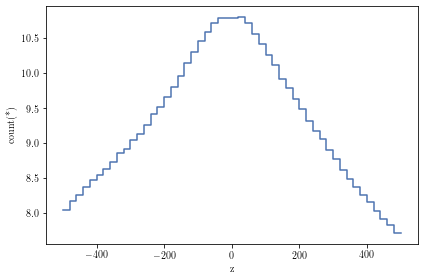

In [16]:
gaia.viz.histogram("z", limits=[-1000, 1000], shape=100, show=True, f="log")

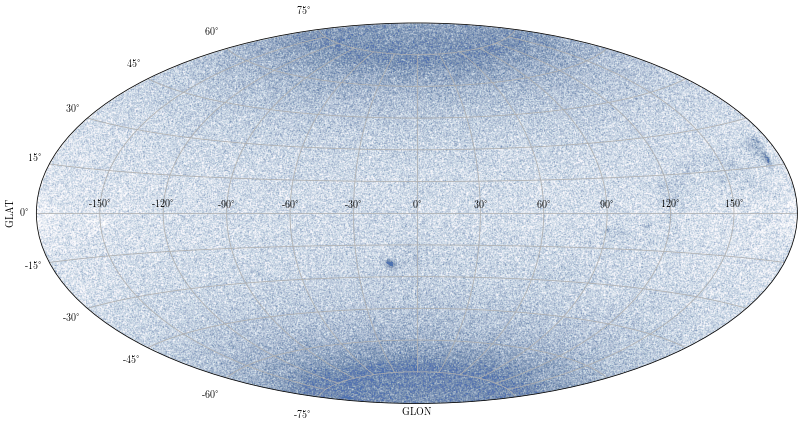

In [17]:
# sanity check
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
gaia.viz.scatter("GLON", "GLAT", length_check=False, s=0.1, alpha=0.1)
plt.grid(True)
plt.show()

In [18]:
gaia.export(join(data_dir, "gaia-neighbour.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :   270.86s =  4.5m =  0.1h   h   
 